!pip install blpapi --index-url=https://bcms.bloomberg.com/pip/simple/

!pip install xbbg

### Extract Data from Bloomberg

from xbbg import blp
import data_handler

date = '2024-03-26'
raw = data_handler.raw_snapshot('HSI Index', date)

output = open('raw.pkl', 'wb')
pickle.dump(raw, output)
output.close()

### Implied Volatility

In [1]:
import constant_vol
import pickle
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

In [2]:
pkl_file = open('raw.pkl', 'rb')
raw = pickle.load(pkl_file)

In [3]:
bs = constant_vol.black_scholes(raw)
bs.root_finding('newton')

C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:315: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


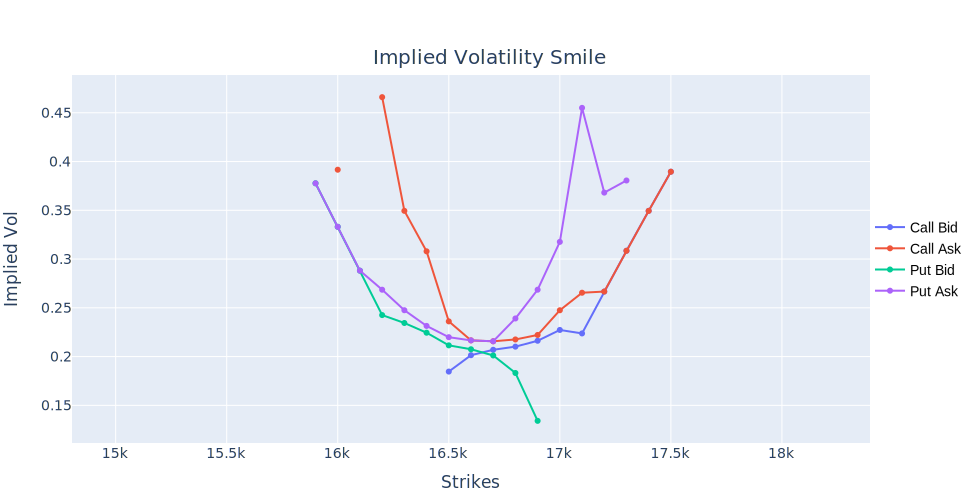

In [4]:
bs.vol_smile_plot(1).show(renderer="svg")

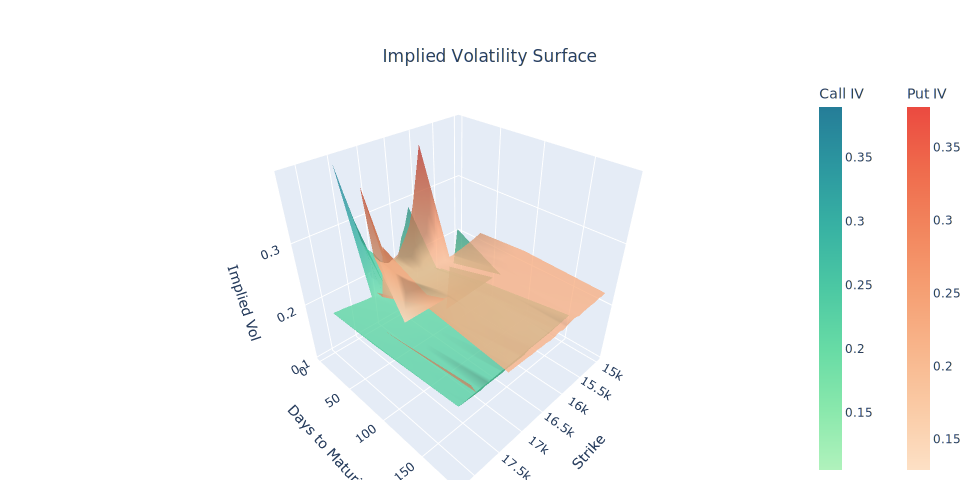

In [5]:
bs.vol_surface_plot().show(renderer="svg")